# Pencil Production: Range of Optimality

In [39]:
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

from typing import List

## Linear Programming Model

\begin{equation*}
\begin{array}{llllll}
\text{max} & 0.41x_e & + & 0.84x_d & & \\
\text{s.t} & & & & & \\
           & \frac{2}{3600}x_e & + & \frac{2}{3600}x_d & \le & 12\\
           & \frac{3.5}{3600}x_e & + & \frac{3.5}{3600}x_d & \le & 8.25\\
           & \frac{1.25}{3600}x_e & + & \frac{8.75}{3600}x_d & \le & 13\\
           & \frac{8}{3600}x_e & + & \frac{10}{3600}x_d & \le & 18\\
           & 0.1x_e & + & 0.1x_d & \le & 15,000\\
           & \frac{1.5}{16}x_e & + & \frac{1.5}{16}x_d & \le & 1,250\\
           & \frac{3}{16}x_e &   &          & \le & 950\\
           &          &   & \frac{3.5}{16}x_d & \le & 1,750\\
           & \frac{2.8}{16}x_e &   &          & \le & 840\\
           &          &   & \frac{2.5}{16}x_d & \le & 1,100\\
           & x_e      & + & x_d      & \le & 10,000\\
           & x_e      & + & x_d      & \le & 32,000\\
           &          &   & x_d      & \le & 20,000\\
           &          &   & x_e,x_d  & \ge & 0\\
\end{array}
\end{equation*}

## Optimal Solution via Graphical Method

In [16]:
def calc_shaping_asbly_intersection():
    A = np.array([[1.25/3600, 8.75/3600], [8/3600, 10/3600]])
    b = np.array([13, 18])
    return np.linalg.solve(A,b)

def calc_matte_paint_econ_limit():
    return 840*16/2.8

def calc_matte_aslby_intersection():
    econ_num = calc_matte_paint_econ_limit()
    return (econ_num, (18 - (8/3600)*econ_num)*(3600/10))

In [26]:
def calc_feasible_region():
    shaping_deluxe_intercept = (0, (13*3600)/8.75)
    matte_paint_econ_intercept = (calc_matte_paint_econ_limit(), 0)
    shaping_asbly_intersect = calc_shaping_asbly_intersection()
    matte_paint_asbly_intersect = calc_matte_aslby_intersection()
    
    x_coords = [0]
    y_coords = [0]

    for pt in [shaping_deluxe_intercept, shaping_asbly_intersect, matte_paint_asbly_intersect, matte_paint_econ_intercept]:
        x_coords.append(pt[0])
        y_coords.append(pt[1])

    x_coords.append(0)
    y_coords.append(0)

    return go.Scatter(
        x = x_coords,
        y = y_coords,
        name = 'Feasible Region',
        fill = 'toself'
    )

def optimal_soln_trace():
    profit = 5008.31
    return go.Scatter(
        x = [0,profit/0.41],
        y = [profit/0.84,0],
        name = f'Profit: ${profit:,.2f}'
    )

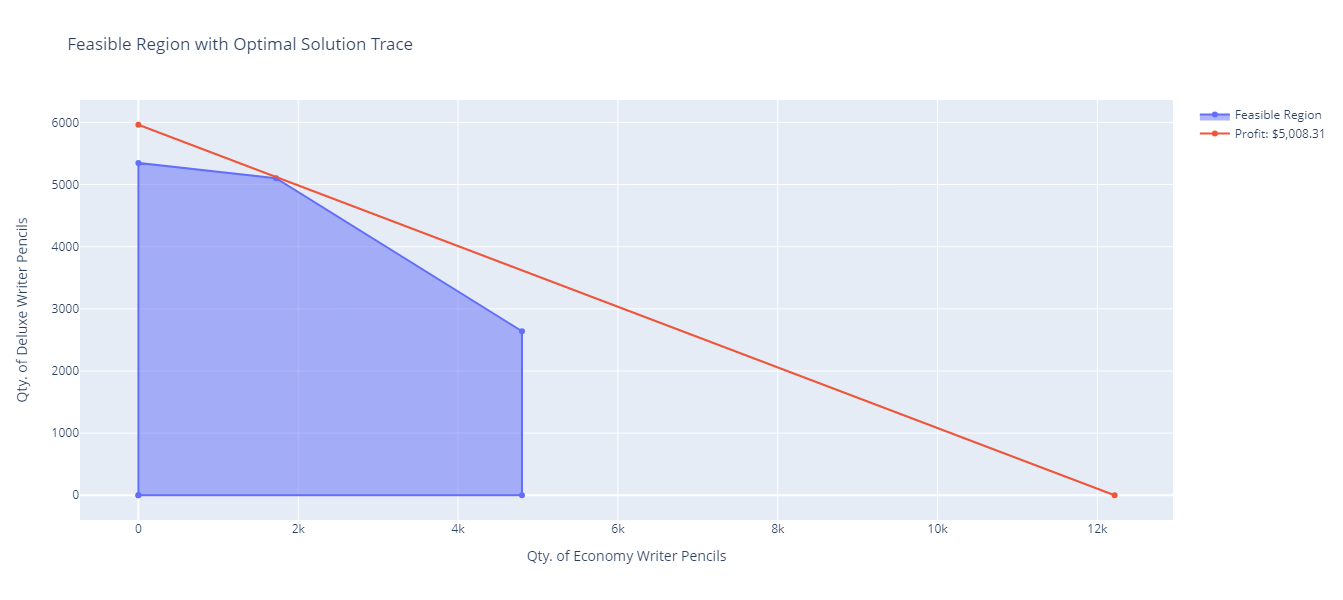

In [30]:
feasible_region = calc_feasible_region()
optimal_trace = optimal_soln_trace()

layout = {
    'height':600,
    'xaxis': {'title': 'Qty. of Economy Writer Pencils'},
    'yaxis': {'title': 'Qty. of Deluxe Writer Pencils'},
    'title': {'text': 'Feasible Region with Optimal Solution Trace'}
}

fig = go.Figure(data=[feasible_region, optimal_trace], layout=layout)
iplot(fig)

## Range of Optimality

**Question**: By how much can the unit profit contribution of the economy writer pencil vary and have the model retain the original optimal solution?

### Graphical Interpretation

In [46]:
def calc_alternate_objective_traces() -> List[go.Scatter]:
    econ_unit_profits = [0.12, 0.32, 0.52, 0.67]
    deluxe_unit_profit = 0.84
    opt_pt = (1721.7, 5102.7)
    traces = []
    for e_profit in econ_unit_profits:
        profit = e_profit*opt_pt[0] + deluxe_unit_profit*opt_pt[1]
        traces.append(go.Scatter(
            x=[0, profit/e_profit],
            y=[profit/deluxe_unit_profit, 0],
            name = f'Economy Unit Profit: ${e_profit:.2f}'
        ))
    return traces

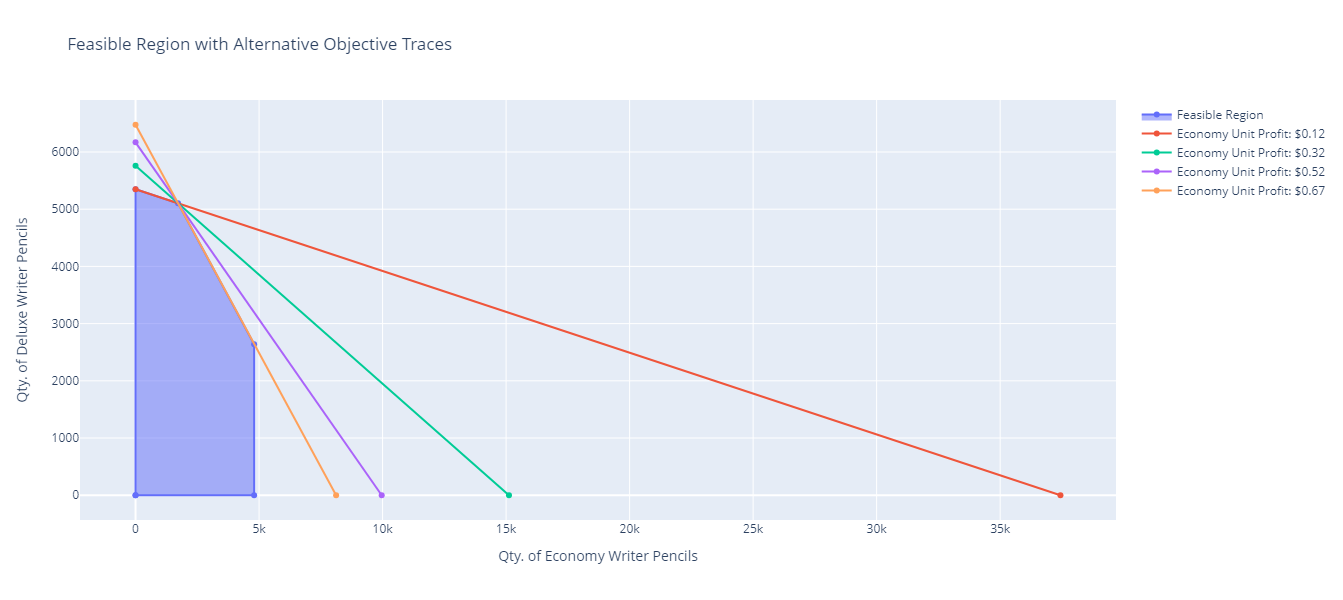

In [48]:
layout['title']['text'] = 'Feasible Region with Alternative Objective Traces'
fig = go.Figure(data=[feasible_region]+calc_alternate_objective_traces(), layout=layout)
iplot(fig)